# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [3]:
data.describe()
print data.shape
print data.income.value_counts()
print len(data.income[data.income ==">50K"])*1.0/len(data)

(45222, 14)
<=50K    34014
>50K     11208
Name: income, dtype: int64
0.247843969749


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [4]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data.income[data.income ==">50K"])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data.income[data.income =="<=50K"])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 1.0 * n_greater_50k/(n_greater_50k + n_at_most_50k)

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 0.25%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

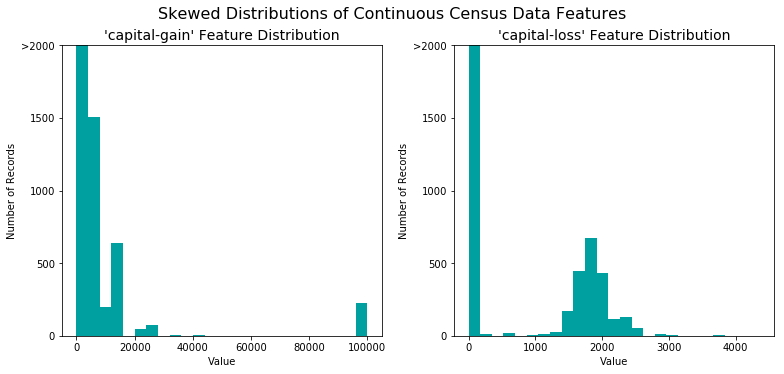

In [5]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

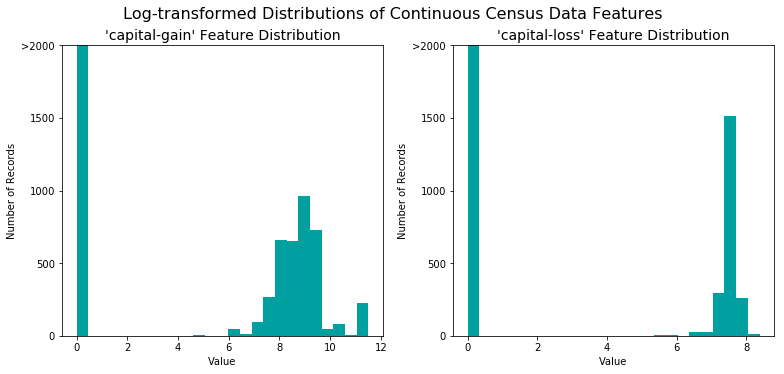

In [6]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [8]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: {"<=50K":0, ">50K": 1}[x])

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded
#print income

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [9]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


/home/tutysara/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [10]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP = np.sum(income)
FP = income.count() - TP
FN = 0
TN = 0

#check
#print TP, FP, TP+FP
#print n_greater_50k, n_at_most_50k, n_greater_50k + n_at_most_50k

accuracy = 1.0 * (TP + TN)/ (TP + FN + FP +TN)
recall = 1.0 * TP/(TP + FN)
precision = 1.0 * TP/(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

In [11]:
# see the correlation between various features and result
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
tdf = pd.DataFrame(data=features_log_minmax_transform, copy=True)
#print tdf.dtypes

obj_columns = tdf.select_dtypes(['object']).columns
#print obj_columns
tdf["workclass"] = tdf["workclass"].astype('category')

tdf[obj_columns] = tdf[obj_columns].apply(lambda x: x.astype('category'))
tdf[obj_columns] = tdf[obj_columns].apply(lambda x: x.cat.codes)
tdf['income'] = income
tdf.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,5,9,0.800000,4,0,1,4,1,0.667492,0.0,0.397959,38,0
1,0.452055,4,9,0.800000,2,3,0,4,1,0.000000,0.0,0.122449,38,0
2,0.287671,2,11,0.533333,0,5,1,4,1,0.000000,0.0,0.397959,38,0
3,0.493151,2,1,0.400000,2,5,0,2,1,0.000000,0.0,0.397959,38,0
4,0.150685,2,9,0.800000,2,9,5,2,0,0.000000,0.0,0.397959,4,0


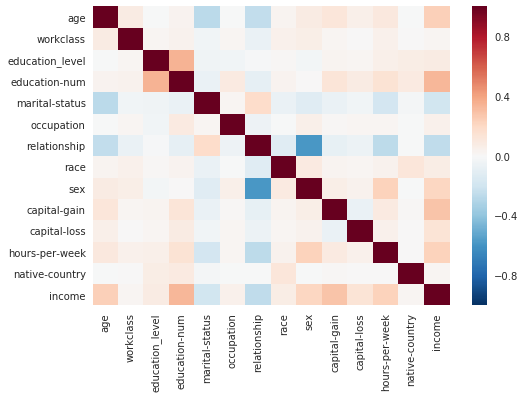

In [12]:
# see correlation matrix
corr = tdf.corr()
sns.heatmap(corr)

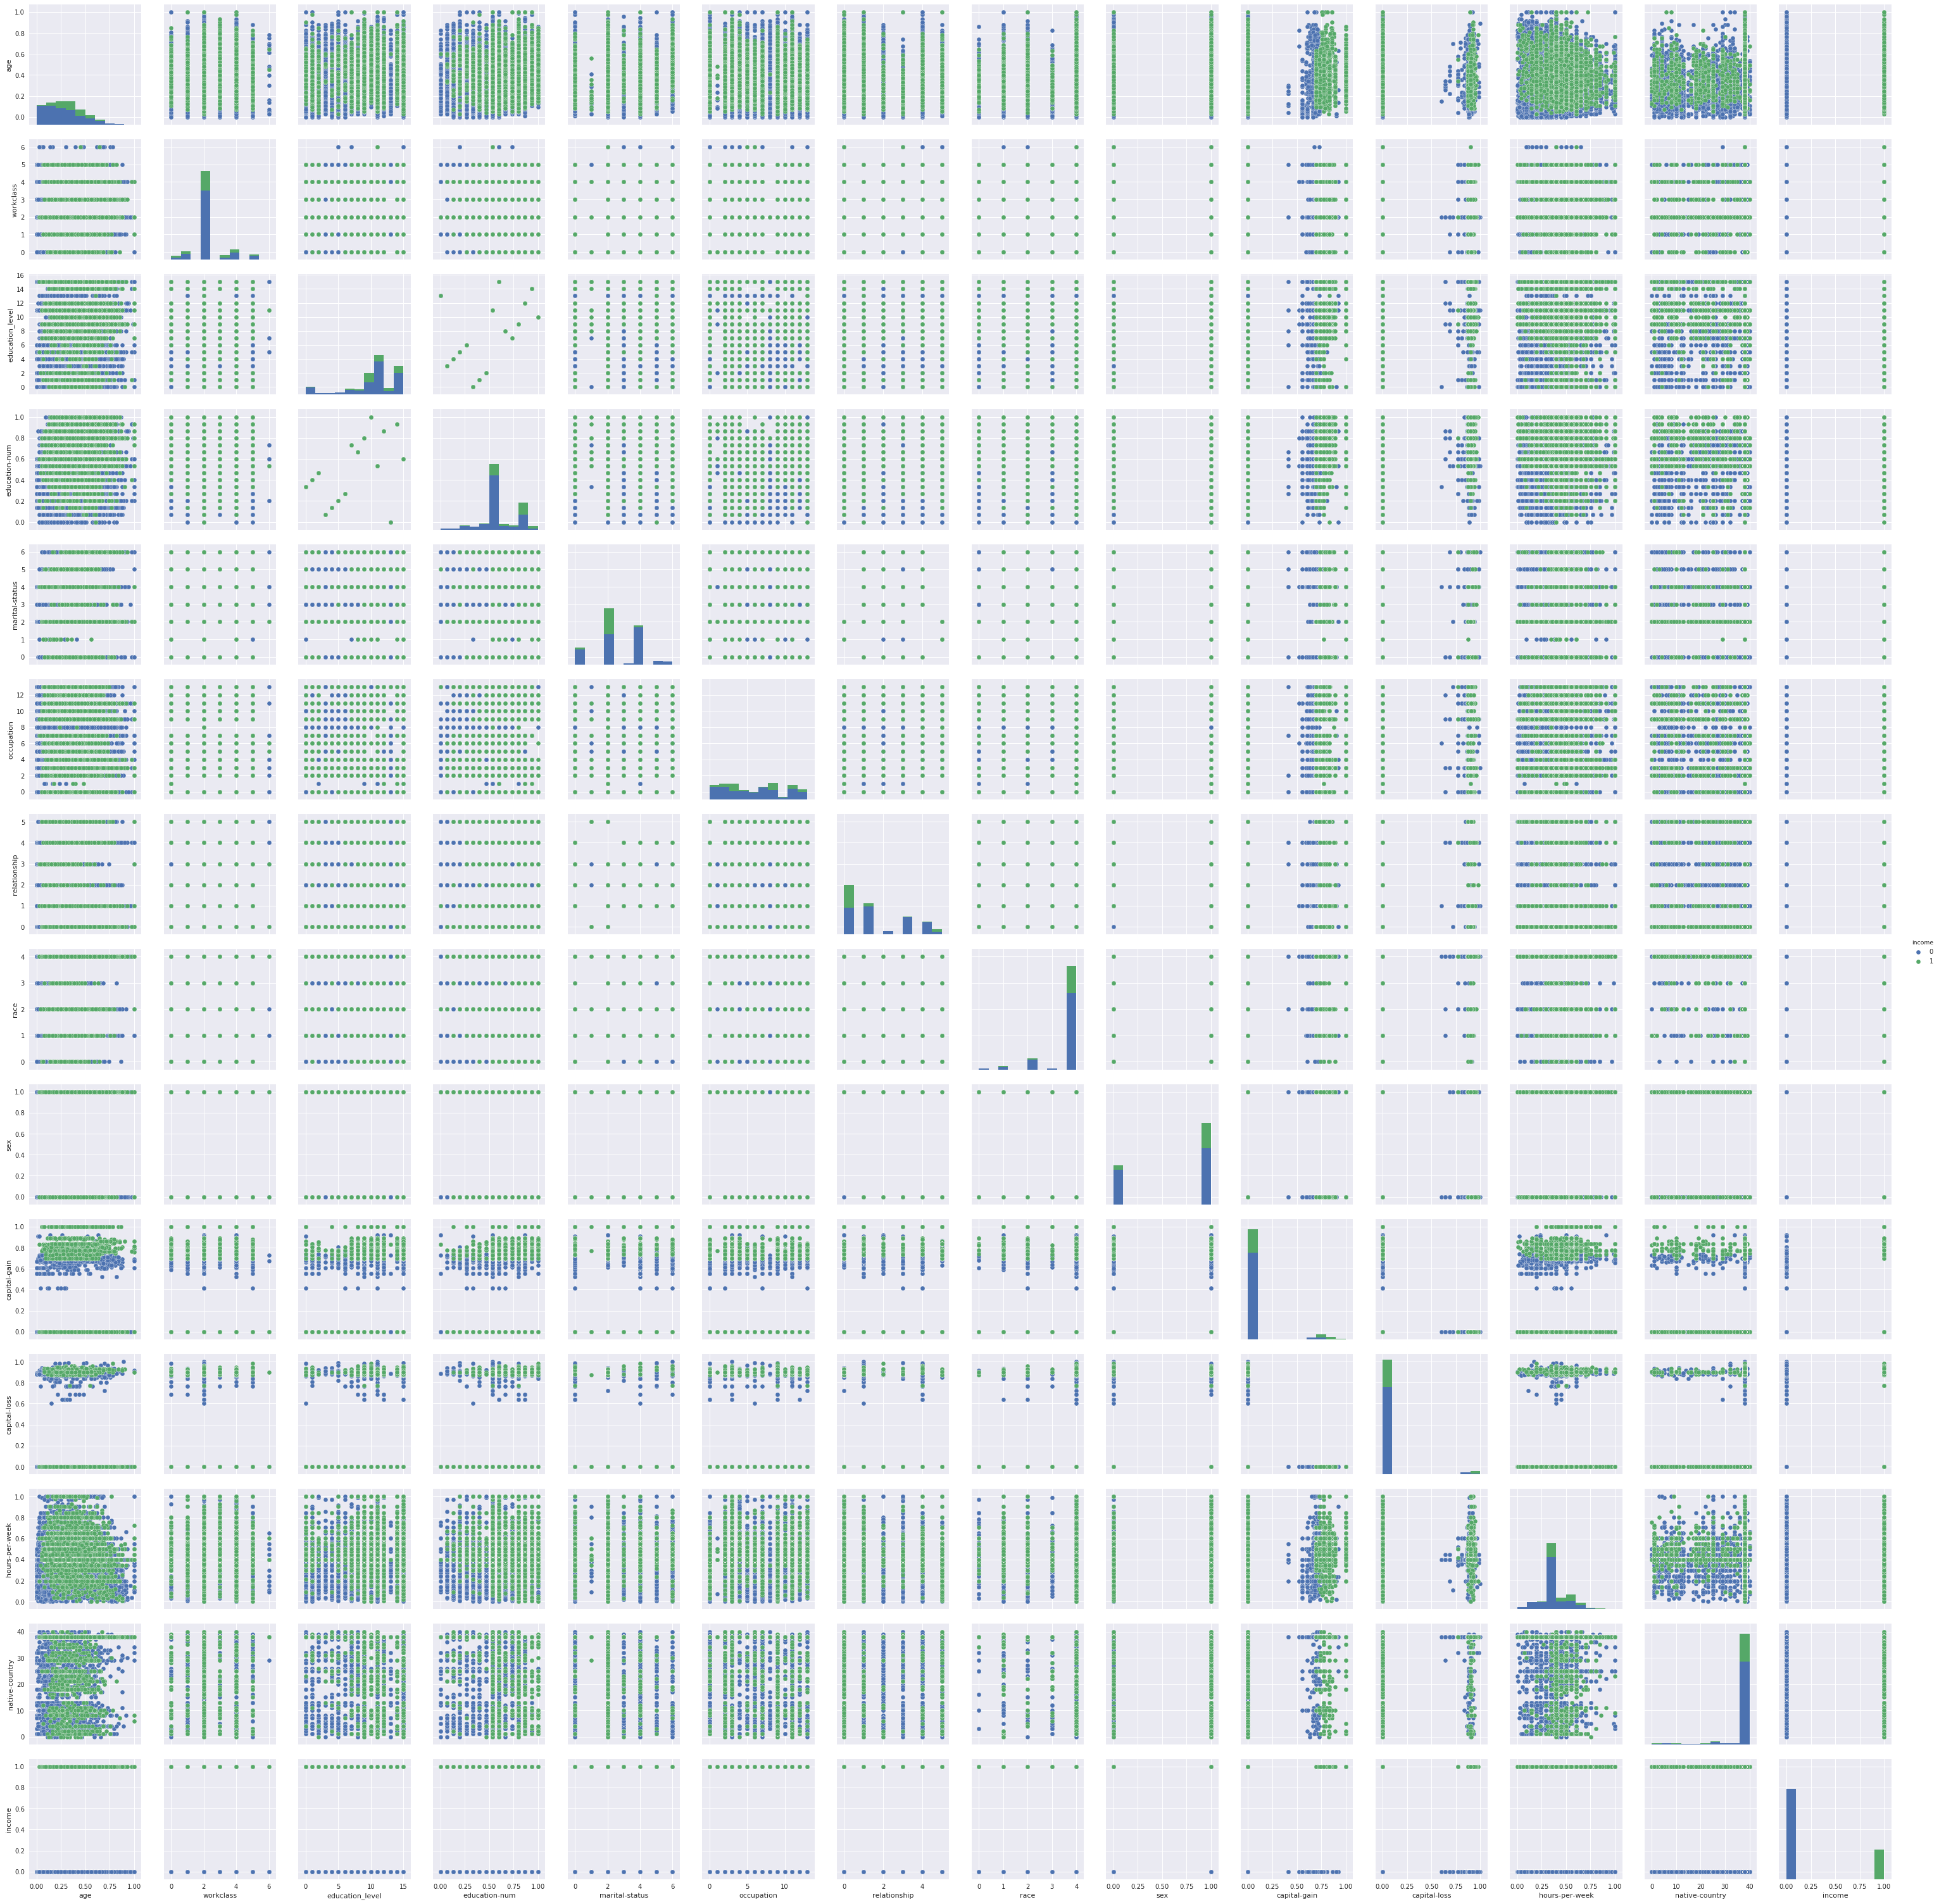

In [13]:
# check for non linearity
sns.pairplot(tdf, hue="income", size=3)

In [14]:
tdf[:3]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,5,9,0.800000,4,0,1,4,1,0.667492,0.0,0.397959,38,0
1,0.452055,4,9,0.800000,2,3,0,4,1,0.000000,0.0,0.122449,38,0
2,0.287671,2,11,0.533333,0,5,1,4,1,0.000000,0.0,0.397959,38,0


**Answer: **

** Data and Problem Consideration **
* Skewed distribution with few positives (>50K), selected model should be agnostic to skewed input
* Many features (103), the selected model shouldn't overfit
* There are outliers. Even after the extreme values in features like captial-gain and capital-loss are squashed using log function the values are spread across a wider range. Few instances have values for them.
* The problem is a binary classification problem so, a classifier should be used as opposed to a regressor.
* There could be a non linear relationship between inputs and the output label. From the graph there is not a single feature that can separate the positive and negative points clearly.

** Reference **
Searching the net and reading through few experiences, decided to try few algorithms based on problem type, size of data, number of features, speed, accuracy etc.
- The main page referenced is -- http://scikit-learn.org/stable/tutorial/machine_learning_map/ which has a flow chart of what algorithms to try.
- There is also this document -- https://docs.microsoft.com/en-us/azure/machine-learning/studio/algorithm-choice which considers the speed and accuracy requirements
- There is alo a wonderful flowchart at -- https://blogs.sas.com/content/subconsciousmusings/2017/04/12/machine-learning-algorithm-use/ which contains data useful in selecting algorithm.

I decided to try a Linear SVM classifier first then a SVM classifier with rbf kernel.
Followed by K-Nearest Neighbours classifier and Gradient Boosting Classifier

** Algorithms Choosen **
* SVM Classifier

   - **Real World Application** SVM classifier is used for protein classification, since they can operate on data with large number of features
   - **Pros** SVM is a high margin classifier. It is fast and performs well(doesn't overfit) even with many features. The documentation(sklearn) states that it can perform well even in cases where the features are greater than samples. It operatest on points near boundary in decision function which is used in training and predicting and is memory efficient.
   - **Cons** It is a blackbox model like neural network and the results cannot be intrepreted. It is slow to train when there are many samples.
   - **Why?** SVMs have good accuracy and can fit a linear or complex function by using linear, poly or rbf kernel. The dataset is moderate sized so, expecting training time to be moderate. The model has many features (103) so, expecting SVM to perform better than other algorithms.
  - PS: Will try both the linear and rbf variant and pick the one which performs well.
  
* K-Nearest Neighbors
    - **Real World Application** KNN classifer is used in places where we have to predict result based on similarity  to training data. Its used in Face recognition system where a person from a group is identified based on how similar the input features are to a particular person than to other persons
    - **Pros** Training is fast since it is a lazy learner and doesn't learns eagerly with data before predicting. Have only few parameters to tune (n_neighbors and weights). It can fit linear and non linear functions. It is non parametric (doesn't assume anything about distribution of data) and can be used when decision boundary is irrugular.
    - **Cons** It is an instance based or non generalizing model and doesn't learn a model. It stores all instances of training data in an indexed structure like Ball Tree or KD Tree to find and lookup easily and it has high memory consumption. It is sensitive to outliers. It has high predicting time since it has to calculate the similarity with all training points to find the nearest neighbour. The value K is domain knowledge and have to be found by trying out values based on knowledge of the probelm being solved
    - **Why?** KNN classifier is easy to train. The data is of moderate size(~33k) so, expecting to be handled with the memory on the machine being used. It can do well in data having irregular boundaries, expecting the data to have a complex bounday since we have many categorical and skewed features.

* Gradient Boosting Classifier

    - **Real World Application** Ensemble methods like Random Forest and Gradient Boosting Classifier are used in many Kaagle competitions winning solution. It is especially useful in places where there is less domain knowledge and not many salient features are available. Application include classification of bad accounts in credit card industry.
    - **Pros** Has very good predictive power. It achieves a good fit by combining many weak learners (base estimators) and reducing the bias and variance. It can handle hetrogeneous(mixed types) features well.
    - **Cons** Requires considerabely more processing power. It cannot be parallelized since each model is constructed sequentially based on the previous.
    - **Why?** We need the best predictive power and gradient boosting is a better fit. The data also contains hetrogenerous features where Gradient boosting is known to help. The data is moderate in size so, expecting it to run in a reasonable amount of time

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [15]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=1)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=1)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

/home/tutysara/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


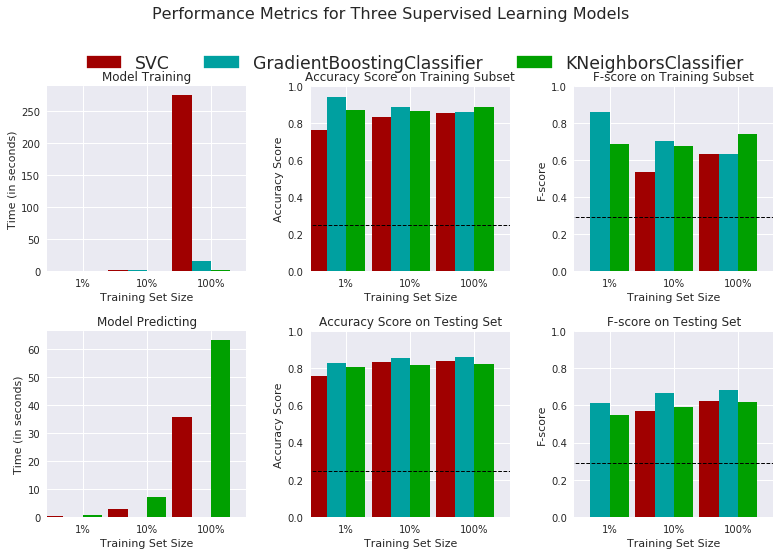

In [25]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
# TODO: Initialize the three models
#clf_A = SVC(kernel='linear')
#clf_A = RandomForestClassifier()
clf_A = SVC()
clf_B = KNeighborsClassifier()
clf_C = GradientBoostingClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **
* GradientBoostingClassifier has the best F score of the three. The other two are very close and not much difference between them in terms of F score, We will consider other metrics like predicting/training time as well to select the best classifier.
* The SVC classifier has a considerably large training time and it increases sharply with the increase in data. The KNN classifier has got a very good training time but the prediction takes a lot of time and it increases with the increase in data since it is a lazy learner. The GradientBoostingClassifier has a comparitively low training time as KNN and relatively low predicting time, even better than SVC classifier. GradientBoostingClassifier is the best classifier in terms of Fscore and also the training/prediction times and it is selected to model the data.
* GradientBoostingClassifier is an ensemble model and it combines the output from many weaklearners to give a more accurate prediction. It also does well on hetrogeneous data which is a good fit for our data since we have a mix of both continous and categorical features. It often gives the best possible model (per this talk -- https://www.youtube.com/watch?v=9wn1f-30_ZY) beating linear models in all settings, Deep learning model in some setting and often beats Random forest when tuned properly. It performs well on binary classification and often the best according to this article (http://fastml.com/what-is-better-gradient-boosted-trees-or-random-forest/), and ours is a binary classification problem. so, GradientBoostingClassifier is selected.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

We choose GradientBoostingClassifier to model our problem. GradientBoostingClassifier is the best in class algorithm for binary classification task and works well with hetrogeneous data. It has good computation performace and predicting power.

GradientBoostingClassifier works by constructing n number of weak learners, where a weak learner is an algorithm that is good at predicting a subset of data and overall it does a bit better than random guessing. The error between current prediction and actual results are called residuals [y-F(x)]. The algorithm improves the model iteratively by fitting weak learners to residuals from previous classification and updating the original model to include it. The process is done n number of times to minimize the dissimilarity between what is predecited and what is observed and finds a model that best fits the pattern in data. The dissimilarity is measured using a loss function like mean squared loss, absolute loss, Huber loss etc and any differential function can be used as loss function. The loss function is minimized using gradient descent and multiplied by a learning rate before being added to the model.

The learning rate, the number of trees to fit and the size of the tree are important factors in tuning the algorithm, the are adjusted to get a best fit model to our problem.

When a new data is fed to out model the n number of trees in the model are consulted and the combined result(majority vote) of all of them is returned as the final prediction.

References
- https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/
- http://www.chengli.io/tutorials/gradient_boosting.pdf
- https://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [28]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
# TODO: Initialize the classifier
clf = GradientBoostingClassifier()
#clf = RandomForestClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {"n_estimators": [10, 100, 1000]}

#parameters = {"n_estimators": [10, 100, 1000], "max_depth": [1, 10, 103]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8712
Final F-score on the testing data: 0.7516


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.863             | 0.871           |
| F-score        | 0.740             | 0.751           |


**Answer: **

- The optimized model has an accuracy score of 0.871 and F-score of 0.751 on testing data
- The optimized model's score is very much greater than the naive predictor which has a F-score of 0.292 and accuracy score of 0.248
- The optimized model performes around 400% better than the naive predictor in fitting the correct model to the data

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

The features that I assume important are
- education-num -- since a person who is more educated will more likely be in a better job and get a good salary
- age -- since salary and earnings increase with increase in experience and keeps increasing util retirement
- sex -- I assume males often earn more than females, since females play a more important role of running the family than earning for the family.
- hours-perweek -- since part time work pays less and earnings increases with increase in hours if payed by hours, which is true for most people
- capital-gain -- since if a person gains money from investments he is wealthy and most probably earns more than 50K

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

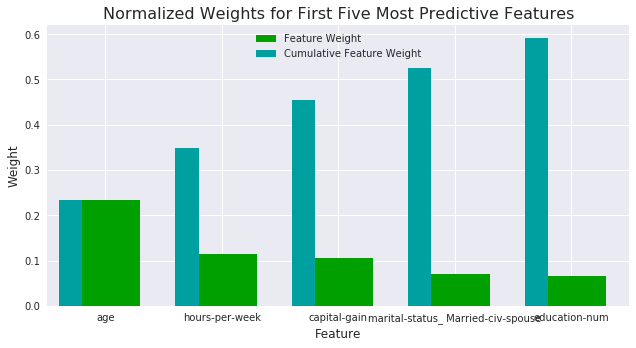

In [18]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
clf = RandomForestClassifier()
#clf.fit(X_train, y_train)
#model = clf
model = best_clf

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [19]:
index = y_train ==1
cl_1 = X_train.loc[y_train ==1,["capital-loss"]]
cl_0 = X_train.loc[y_train ==0,["capital-loss"]]
display(cl_1.describe())
display(cl_0.describe())

,capital-loss
count,9003.000000
mean,0.089626
std,0.270321
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.955665


,capital-loss
count,27174.000000
mean,0.026838
std,0.152096
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True)[:25]

[('age', 0.23337737703324571),
 ('hours-per-week', 0.11469134149883804),
 ('capital-gain', 0.10640360796110411),
 ('marital-status_ Married-civ-spouse', 0.069947426107026589),
 ('education-num', 0.066570041174476055),
 ('relationship_ Husband', 0.048606423350933008),
 ('capital-loss', 0.036061666655908445),
 ('marital-status_ Never-married', 0.025214390559701066),
 ('occupation_ Exec-managerial', 0.019165137802527602),
 ('occupation_ Prof-specialty', 0.015235136409010711),
 ('education_level_ Bachelors', 0.013112191713777208),
 ('relationship_ Not-in-family', 0.011775746182965861),
 ('workclass_ Private', 0.010996160562067892),
 ('relationship_ Wife', 0.010043045922380174),
 ('sex_ Female', 0.0097402279409183265),
 ('sex_ Male', 0.0092164131810050908),
 ('relationship_ Own-child', 0.0089934824495559642),
 ('workclass_ Self-emp-not-inc', 0.0088851405007314768),
 ('occupation_ Other-service', 0.0082196793163606934),
 ('education_level_ HS-grad', 0.0080721351385620952),
 ('education_level

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**
* I was able to predict all the features except for captital-loss, I assumed sex to be an important feature and females will be earning generally lower than their male couterpart, but I was proved to be wrong and it is not a strong feature as assumed. Also sex is a categorical feature and it is split into two features (sex_male and sex_female)
* The visualization helps in understanding the relative impact of each features and the cumulative contribution to the weights. We can see that the first two important features (age and hours-per-week) cumulatively covered almost quarter of the weights  and the remaining 3 covering the next quarter. We can see that the contribution of successive features on righ keeps decreasing.
* I misjudged the capital-loss feature, we can see that higher capital loss is also an indicator of more earnings. I assume this is because of pocession of large assets or investiments which may have resulted in a loss that particular year and the person must be wealthy to be able to invest in the assets in the first place. We see capital-loss is also a sign of a wealthy person even though it looks otherwise. I also got the ordering wrong, I assumed education-num to be the biggest predictor but it turns out that age has more weightage. I assume this is because given that the education being same an experienced person takes more pay. The earnings keeps increasing with increase in age even with same number of education-num. I also included sex which is not considered by the model in the top 5 and it didn't even came in top 10. I assume there is a good number of females employed in similar paying jobs as male due to which it is not the best features to split the tree compared to others.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [30]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
#X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:15]]]
#X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:15]]]

X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8712
F-score on testing data: 0.7516

Final Model trained on reduced data
------
Accuracy on testing data: 0.8492
F-score on testing data: 0.7016


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

* The F-score and accuracy of the reduced data with 5 features are not comparable to the results got from all features. The F-Score was around **0.70** and accuracy was around **0.849**. But it got increase to **0.74** and **0.86** by using 15 of the 103 features instead of just 5.
* Yes I would consider a reduced data as training set if time is a factor, but I woldn't use just the 5 features I will use something like 15 features which gives a comparable result to the full training data. The learners used in this model are weak learners so, they use only a fraction of features to construct the trees in each iteration. The inclusion of more features doesn't fit a bigger tree so, more features shouldn't affect the traning time much except to decide which feature to use at each step. Even though the training time is a bit long, the predicting time of the model is very quick even with all features. Once trained it can be used many times to get a prediction with good accuracy.  GradientBoostingClassifier operate sequentially to improve the result, we may try something like RandomForestClassifier which gives similar accuracy score but can be parallelized to speed up training time before settling on using less number of features to improve accuracy. I would trade in the training time to accuracy only at extreme need of quick training times.

*I tried RandomForestClassifier on the data and noticed it is extremely fast in training, even faster than KNeighborsClassifier. But the accuracy and F-score is not on par with GradientBoostingClassifier. It has a F-score of 0.682 and Accuracy of 0.842 on test data when trainined on all data with all features as opposed to GradientBoostingClassifier which has got a F-score of 0.752 and Accuracy of 0.871. For this problem I guess GradientBoostingClassifier with moderate number of feature(~15) is a better fit than RandomForestClassifier. I guess the RandomForestClassifier can be tuned better by constraining on the max_depth in addition to the number of trees. I tested this by including the max_depth param for optimizing RandomForestClassifier and got a F-socre of 0.729 and Accuracy score of 0.856 on training with full training data, which is comparable to GradientBoostingClassifier, but again tuning time was long compared to tuning just a single param. So, we always have a tradeoff based on problem size, computing resources and time constraint and we have to choose the best combination that satisfies user needs*

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.